# CHIP Distributions

In [1]:
library(data.table)
library(ggplot2)
library(ggpubr)
library(cowplot)
theme_set(theme_cowplot())
library(dplyr)
library(tidyr)


Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend



Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/")

In [3]:
# Baseline pop
aric_baseline_full <- fread("aric_baseline_N10881.pheno_ch_status.23Mar2023.csv", header=T)

# N = 4,189
aric_baseline_n_v05 <- fread("aric_baseline_n_v05_N10881.pheno_ch_status.23Mar2023.csv", header=T)

    # qcd CH variants with phenotypes
ch_var_in_baseline_qcd.pheno <- fread("ch_var_in_baseline_qcd_pheno.23Mar2023.csv", header = T)

ch_var_in_v05_qcd.pheno <- fread("ch_var_in_v05_qcd_pheno.23Mar2023.csv", header = T)


## Table 1. Study cohor (4k)

In [20]:
# Age
summary(aric_baseline_n_v05$age_base)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.00   51.00   55.00   55.48   59.00   83.00 

In [27]:
table(aric_baseline_n_v05$race_BW, aric_baseline_n_v05$Gender)

table(aric_baseline_n_v05$Gender)
round(prop.table(table( aric_baseline_n_v05$Gender))*100,1)

table(aric_baseline_n_v05$race_BW)
round(prop.table(table( aric_baseline_n_v05$race_BW))*100,1)

table( aric_baseline_n_v05$ever_smoke)
round(prop.table(table( aric_baseline_n_v05$ever_smoke))*100,1)

   
       F    M
  B  638  313
  W 1842 1396


   F    M 
2480 1709 


   F    M 
59.2 40.8 


   B    W 
 951 3238 


   B    W 
22.7 77.3 


   0    1 
1909 2269 


   0    1 
45.7 54.3 

In [8]:
cat("age_base: M")
round(summary(aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)

round(summary(aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)

wilcox.test(aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
t.test(aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

cat("age_base: F")
round(summary(aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)

round(summary(aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)

wilcox.test(aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
            aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])

t.test(aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
            aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])



age_base: M

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   45.0    51.0    53.0    54.5    57.0    83.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   46.0    52.0    55.0    56.3    60.0    78.0 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
W = 173864, p-value = 1.494e-08
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
t = -4.8893, df = 449.08, p-value = 1.411e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.505484 -1.068799
sample estimates:
mean of x mean of y 
 54.50799  56.29513 


age_base: F

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   45.0    50.0    53.0    54.4    58.0    78.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   46.0    51.0    55.0    55.4    59.0    72.0 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 512710, p-value = 1.488e-06
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$age_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
t = -4.0239, df = 1040.5, p-value = 6.14e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.5240634 -0.5248884
sample estimates:
mean of x mean of y 
 54.37618  55.40065 


In [9]:
# Smoked
cat("smoked: M")
table(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

wilcox.test(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
t.test(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

cat("smoked: F")
table(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

wilcox.test(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])

t.test(aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])


smoked: M


  0   1 
103 206 


   0    1 
33.3 66.7 


  0   1 
456 940 


   0    1 
32.7 67.3 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
W = 214240, p-value = 0.8209
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
t = -0.22548, df = 452.55, p-value = 0.8217
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06495612  0.05158458
sample estimates:
mean of x mean of y 
0.6666667 0.6733524 


smoked: F


  0   1 
398 234 


 0  1 
63 37 


  0   1 
952 889 


   0    1 
51.7 48.3 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 516229, p-value = 9.294e-07
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
t = -5.0111, df = 1127.4, p-value = 6.278e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.15673858 -0.06853456
sample estimates:
mean of x mean of y 
0.3702532 0.4828897 


In [11]:
# BMI
round(summary(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)
cat("AA M sd=",round(sd(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1))

round(summary(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)
cat("EA M sd=",round(sd(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1) )

t.test(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

    # Female
round(summary(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)
cat("AA F sd=",round(sd(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )

round(summary(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)

cat("EA F sd=",round(sd(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )

wilcox.test(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])

t.test(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])

t.test(aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])$p.value

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   18.0    25.0    27.5    28.0    30.6    47.3       1 

AA M sd= 4.3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   18.2    25.2    27.3    27.8    29.9    49.5       2 

EA M sd= 3.8


	Welch Two Sample t-test

data:  aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
t = 0.76801, df = 428.9, p-value = 0.4429
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3163221  0.7220651
sample estimates:
mean of x mean of y 
 27.95816  27.75528 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   17.7    26.2    29.8    30.8    33.7    55.0       1 

AA F sd= 6.5

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   15.9    23.0    25.7    26.7    29.3    51.3 

EA F sd= 5.1


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 823982, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$bmi_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
t = 14.389, df = 924.92, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.529632 4.644539
sample estimates:
mean of x mean of y 
 30.80173  26.71465 


[1] 1.645637e-42

In [12]:
str(aric_baseline_n_v05)

Classes 'data.table' and 'data.frame':	4189 obs. of  105 variables:
 $ GWAS_ID             : chr  "A00004" "A00009" "A00012" "A00013" ...
 $ ARIC_ID             : chr  "M102321" "F101210" "W121907" "M263966" ...
 $ GWASID_Visit        : chr  "A00004_V05" "A00009_V05" "A00012_V05" "A00013_V05" ...
 $ cram_id             : chr  "H5TH7DSX2-2-IDUDI0072" "HNTCYDSX2-2-IDUDI0060" "HNTGWDSX2-1-IDUDI0006" "HKNWTDSX2-3-IDUDI0063" ...
 $ Visit.x             : chr  "V05" "V05" "V05" "V05" ...
 $ Gender              : chr  "F" "F" "F" "M" ...
 $ Age                 : int  71 76 79 82 82 83 71 71 77 84 ...
 $ CH_baseline         : int  1 0 0 1 0 0 0 0 0 0 ...
 $ CH_v05              : int  1 0 0 1 0 0 0 0 0 0 ...
 $ incident_CH         : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_CHvaf05    : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_CHvaf10    : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_DNMT3A     : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_TET2       : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_

In [12]:
# lipids
    # chol_base
round(summary(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)

cat("M AA chol_base mad=",round(mad(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1))
cat("M AA chol_base sd=",round(sd(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1))

round(summary(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)
cat("M EA chol_base mad=",round(mad(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1) )
cat("M EA chol_base sd=",round(sd(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1) )

wilcox.test(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

t.test(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

# 
round(summary(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)

cat("F AA chol_base mad=",round(mad(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1))
cat("F AA chol_base sd=",round(sd(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1))

round(summary(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)
cat("F EA chol_base mad=",round(mad(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )
cat("F EA chol_base sd=",round(sd(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )


wilcox.test(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])

t.test(aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])

    # ldl_base
round(summary(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)

cat("M AA ldl_base mad=",round(mad(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1))

cat("M AA ldl_base sd=",round(sd(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1))


round(summary(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)
cat("M EA ldl_base mad=",round(mad(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1) )
cat("M EA ldl_base sd=",round(sd(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1) )

wilcox.test(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

t.test(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

#
round(summary(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)

cat("F AA ldl_base mad=",round(mad(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1))
cat("F AA ldl_base sd=",round(sd(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1))


round(summary(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)
cat("F EA ldl_base mad=",round(mad(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )
cat("F EA ldl_base sd=",round(sd(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )

wilcox.test(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])
t.test(aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])


    # hdl_base
round(summary(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)

cat("AA hdl_base mad=",round(mad(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1))
cat("AA hdl_base sd=",round(sd(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1))

round(summary(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)
cat("EA hdl_base mad=",round(mad(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1) )
cat("EA hdl_base sd=",round(sd(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1) )

wilcox.test(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

t.test(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

#
round(summary(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)

cat("F AA hdl_base mad=",round(mad(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1))
cat("F AA hdl_base sd=",round(sd(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1))

round(summary(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)
cat("F EA hdl_base mad=",round(mad(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )
cat("F EA hdl_base sd=",round(sd(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )

wilcox.test(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])
t.test(aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])
    # tg_base
round(summary(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)

cat("AA tg_base mad=",round(mad(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1))
cat("AA tg_base sd=",round(sd(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1))

round(summary(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)
cat("EA tg_base mad=",round(mad(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1) )
cat("EA tg_base sd=",round(sd(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"], na.rm = T),1) )

wilcox.test(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
t.test(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

#
round(summary(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)

cat("F AA tg_base mad=",round(mad(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1))
cat("F AA tg_base sd=",round(sd(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1))

round(summary(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)
cat("F EA tg_base mad=",round(mad(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )
cat("F EA tg_base sd=",round(sd(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"], na.rm = T),1) )

wilcox.test(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])

t.test(aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
       aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    2.9     4.6     5.1    12.9     5.9   249.1       2 

M AA chol_base mad= 0.9M AA chol_base sd= 37.4

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.8     4.7     5.2     8.3     5.8   245.0 

M EA chol_base mad= 0.8M EA chol_base sd= 24.6


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
W = 219656, p-value = 0.7429
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
t = 2.0655, df = 371.82, p-value = 0.03956
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2201734 8.9504589
sample estimates:
mean of x mean of y 
12.900740  8.315424 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    2.7     4.7     5.4     8.8     6.2   254.0       3 

F AA chol_base mad= 1F AA chol_base sd= 25.3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.6     4.9     5.4     6.9     6.1   255.3 

F EA chol_base mad= 0.9F EA chol_base sd= 17.5


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 570057, p-value = 0.3417
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$chol_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
t = 1.7312, df = 853.56, p-value = 0.08378
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2508641  4.0022440
sample estimates:
mean of x mean of y 
 8.773492  6.897802 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.7     2.8     3.4     8.6     4.0   180.0       5 

M AA ldl_base mad= 0.9M AA ldl_base sd= 25.8

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.1     2.9     3.4     5.5     4.0   175.2      38 

M EA ldl_base mad= 0.8M EA ldl_base sd= 16.3


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
W = 205188, p-value = 0.6049
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
t = 2.0538, df = 364.5, p-value = 0.0407
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1340857 6.1711369
sample estimates:
mean of x mean of y 
 8.623838  5.471227 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.4     2.7     3.4     5.4     4.0   153.6       7 

F AA ldl_base mad= 0.9F AA ldl_base sd= 14.8

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.3     2.7     3.3     4.2     3.9   160.8      24 

F EA ldl_base mad= 0.9F EA ldl_base sd= 11.1


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 605734, p-value = 0.03564
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$ldl_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
t = 1.7681, df = 889.74, p-value = 0.07739
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1253195  2.4029706
sample estimates:
mean of x mean of y 
 5.364998  4.226173 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.5     1.0     1.2     3.0     1.5    63.2       2 

AA hdl_base mad= 0.4AA hdl_base sd= 8.3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.4     0.9     1.1     1.7     1.2    51.0       1 

EA hdl_base mad= 0.3EA hdl_base sd= 4.8


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
W = 280689, p-value = 4.659e-16
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
t = 2.6427, df = 356.75, p-value = 0.008588
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.330847 2.255777
sample estimates:
mean of x mean of y 
 2.980639  1.687327 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.7     1.2     1.4     2.5     1.7   102.0       5 

F AA hdl_base mad= 0.4F AA hdl_base sd= 7.8

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.1     1.2     1.4     1.9     1.8    79.0       7 

F EA hdl_base mad= 0.4F EA hdl_base sd= 4.6


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 577575, p-value = 0.8359
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$hdl_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
t = 1.9102, df = 784.57, p-value = 0.05647
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01737901  1.27444227
sample estimates:
mean of x mean of y 
 2.482678  1.854146 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.3     0.8     1.1     5.2     1.6   150.0       2 

AA tg_base mad= 0.5AA tg_base sd= 19.6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.4     1.0     1.4     4.3     2.0   352.5 

EA tg_base mad= 0.7EA tg_base sd= 23.1


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
W = 166826, p-value = 1.63e-10
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
t = 0.75015, df = 520.67, p-value = 0.4535
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.543215  3.449773
sample estimates:
mean of x mean of y 
 5.213517  4.260238 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.3     0.8     1.0     3.2     1.4   264.0       3 

F AA tg_base mad= 0.4F AA tg_base sd= 17.1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.4     0.9     1.3     2.3     1.8   231.0 

F EA tg_base mad= 0.6F EA tg_base sd= 11.3


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 465572, p-value = 1.667e-14
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$tg_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
t = 1.301, df = 832.48, p-value = 0.1936
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4813469  2.3739476
sample estimates:
mean of x mean of y 
 3.247407  2.301107 


In [15]:
aric_baseline_n_v05$dAge <- aric_baseline_n_v05$Age - aric_baseline_n_v05$age_base

In [17]:
round(summary(aric_baseline_n_v05$dAge),1)

round(sd(aric_baseline_n_v05$dAge),2)

round(mad(aric_baseline_n_v05$dAge),2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    20.0    21.0    20.3    21.0    27.0 

[1] 2.03

[1] 1.48

In [19]:
cat("Follow-up: M")
round(summary(aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)

round(summary(aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="M"]),1)

wilcox.test(aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
t.test(aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"],
       aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

cat("Follow-up: F")
round(summary(aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)

round(summary(aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"]),1)

wilcox.test(aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
            aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])

t.test(aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="F"],
            aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="F"])


Follow-up: M

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.0    20.0    21.0    20.3    22.0    26.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    19.0    20.0    20.1    21.0    27.0 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
W = 247360, p-value = 0.0001904
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
t = 1.2442, df = 384.71, p-value = 0.2142
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1295065  0.5758480
sample estimates:
mean of x mean of y 
 20.31629  20.09312 


Follow-up: F

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    20.0    21.0    20.5    22.0    26.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.0    20.0    21.0    20.4    21.0    25.0 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 618788, p-value = 0.04066
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$dAge[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
t = 1.5243, df = 878.53, p-value = 0.1278
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04224846  0.33609221
sample estimates:
mean of x mean of y 
 20.53292  20.38599 


In [11]:
# Clinical traits
# dm_126_base, htn_5_base,  chol_med_base, hf_base, chd_base, is_base, hs_base, 
cat("chd_base: M")
table(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

wilcox.test(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
t.test(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], 
       aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])$p.value

cat("chd_base: F")
table(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

wilcox.test(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])

t.test(aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])$p.value

chd_base: M


  0   1 
309   4 


   0    1 
98.7  1.3 


   0    1 
1306   90 


   0    1 
93.6  6.4 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
W = 74156, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


[1] 2.048257e-08

chd_base: F


  0   1 
629   9 


   0    1 
98.6  1.4 


   0    1 
1818   24 


   0    1 
98.7  1.3 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$chd_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 588231, p-value = 0.838
alternative hypothesis: true location shift is not equal to 0


[1] 0.8409915

In [13]:
# Clinical traits
# dm_126_base, htn_5_base,  chol_med_base, hf_base, chd_base, is_base, hs_base, 
cat("chol_med_base: M")
table(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

wilcox.test(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])

formatC(t.test(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], 
       aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])$p.value,
        digits = 1,format = "E")

cat("chol_med_base: F")
table(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

wilcox.test(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])

formatC(x =t.test(aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])$p.value, 
        digits = 1,format = "E")

chol_med_base: M


  0   1 
300  11 


   0    1 
96.5  3.5 


   0    1 
1280  115 


   0    1 
91.8  8.2 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "M"] and aric_baseline_n_v05$ever_smoke[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "M"]
W = 78586, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


[1] "2.6E-04"

chol_med_base: F


  0   1 
619  14 


   0    1 
97.8  2.2 


   0    1 
1751   91 


   0    1 
95.1  4.9 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW == "B" & aric_baseline_n_v05$Gender == "F"] and aric_baseline_n_v05$chol_med_base[aric_baseline_n_v05$race_BW == "W" & aric_baseline_n_v05$Gender == "F"]
W = 567086, p-value = 0.003307
alternative hypothesis: true location shift is not equal to 0


[1] "4.3E-04"

In [14]:
# Clinical traits
# dm_126_base, htn_5_base,  , hf_base, is_base, hs_base, 
cat("dm_126_base: M")
table(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

formatC(t.test(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], 
       aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])$p.value,
        digits = 1,format = "E")

cat("dm_126_base: F")
table(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)


formatC(x =t.test(aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$dm_126_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])$p.value, 
        digits = 1, format = "E")

dm_126_base: M


  0   1 
264  43 


 0  1 
86 14 


   0    1 
1268  127 


   0    1 
90.9  9.1 

[1] "2.2E-02"

dm_126_base: F


  0   1 
534  97 


   0    1 
84.6 15.4 


   0    1 
1758   82 


   0    1 
95.5  4.5 

[1] "1.4E-12"

In [15]:
# Clinical traits
# htn_5_base,  hf_base, is_base, hs_base, 
cat("htn_5_base: M")
table(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

formatC(t.test(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], 
       aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])$p.value,
        digits = 1,format = "E")

cat("htn_5_base: F")
table(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)


formatC(x =t.test(aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$htn_5_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])$p.value, 
        digits = 1,format = "E")

htn_5_base: M


  0   1 
171 140 


 0  1 
55 45 


   0    1 
1034  361 


   0    1 
74.1 25.9 

[1] "9.7E-10"

htn_5_base: F


  0   1 
305 330 


 0  1 
48 52 


   0    1 
1477  363 


   0    1 
80.3 19.7 

[1] "3.2E-44"

In [16]:
# Clinical traits
# hf_base, is_base, 
cat("hf_base: M")
table(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

formatC(t.test(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], 
       aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])$p.value,
        digits = 1,format = "E")

cat("hf_base: F")
table(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)


formatC(x =t.test(aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$hf_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])$p.value,
        digits = 1,format = "E")

hf_base: M


  0   1 
304   4 


   0    1 
98.7  1.3 


   0    1 
1349   14 


 0  1 
99  1 

[1] "7.0E-01"

hf_base: F


  0   1 
594  41 


   0    1 
93.5  6.5 


   0    1 
1765   55 


 0  1 
97  3 

[1] "1.2E-03"

In [21]:
table(aric_baseline_n_v05$is_base, exclude = NULL)


   0    1 <NA> 
4050   42   97 

In [24]:
# Clinical traits
#  is_base, 

cat("is_base: M")
table(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

formatC(t.test(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], 
       aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])$p.value,
        digits = 1,format = "E")

cat("is_base: F")
table(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)


formatC(x =t.test(aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$is_base[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])$p.value, ,digits = 1,format = "E")

is_base: M


  0   1 
307   5 


   0    1 
98.4  1.6 


   0    1 
1355    9 


   0    1 
99.3  0.7 

[1] "2.1E-01"

is_base: F


  0   1 
621   8 


   0    1 
98.7  1.3 


   0    1 
1767   20 


   0    1 
98.9  1.1 

[1] "7.7E-01"

In [8]:
names(aric_baseline_n_v05)

[1] "GWAS_ID"              "ARIC_ID"              "GWASID_Visit"        
  [4] "cram_id"              "Visit.x"              "Gender"              
  [7] "Age"                  "CH_baseline"          "CH_v05"              
 [10] "incident_CH"          "incident_CHvaf05"     "incident_CHvaf10"    
 [13] "incident_DNMT3A"      "incident_TET2"        "incident_ASXL1"      
 [16] "incident_DTA"         "incident_SF"          "incident_DDR"        
 [19] "sex_v5"               "race_v5"              "center_v5"           
 [22] "dob_v5"               "date_v5"              "age_v5"              
 [25] "fast_8_v5"            "bmi_v5"               "dm_126_v5"           
 [28] "gluc_v5"              "htn_5_v5"             "chol_v5"             
 [31] "hdl_v5"               "ldl_v5"               "tg_v5"               
 [34] "chol_med_v5"          "statin_v5"            "cig_v5"              
 [37] "chd_v5"               "is_v5"                "hs_v5"               
 [40] "hf_v5"                "death.x"              "death_date.x"        
 [43] "bmi_v5_std"           "gluc_v5_std"          "chol_v5_std"         
 [46] "hdl_v5_std"           "ldl_v5_std"           "tg_v5_std"           
 [49] "non_hdl_v5_std"       "hg38_CRAM_ID"         "aricid"              
 [52] "Visit.y"              "sex"                  "race"                
 [55] "center"               "dob"                  "date_base"           
 [58] "age_base"             "fast_8_base"          "bmi_base"            
 [61] "dm_126_base"          "gluc_base"            "htn_5_base"          
 [64] "chol_base"            "hdl_base"             "ldl_base"            
 [67] "tg_base"              "chol_med_base"        "statin_base"         
 [70] "cig_base"             "chd_date"             "is_date"             
 [73] "hs_date"              "hf_date"              "death.y"             
 [76] "death_date.y"         "lfu_date"             "chd_base"            
 [79] "is_base"              "hs_base"              "hf_base"             
 [82] "ever_smoke"           "v2_vs_other"          "Sex"                 
 [85] "race_BW"              "BMI_cat"              "nonHDL_std"          
 [88] "hdl_base_std"         "ldl_base_std"         "chol_base_std"       
 [91] "tg_base_std"          "gluc_base_std"        "bmi_base_std"        
 [94] "CHvaf10_baseline"     "CH_baseline_v05"      "CHvaf10_baseline_v05"
 [97] "CH_DTA"               "CH_SF"                "CH_DDR"              
[100] "CH_DNMT3A"            "CH_TET2"              "CH_ASXL1"            
[103] "nonHDL_base_std"      "age_base_sqr"         "Center"

In [27]:
## CH status
cat("CH_baseline: M")
table(aric_baseline_n_v05$CH_baseline)
round(prop.table(table(aric_baseline_n_v05$CH_baseline))*100,1)

cat("CHvaf10_baseline: M")
table(aric_baseline_n_v05$CHvaf10_baseline)
round(prop.table(table(aric_baseline_n_v05$CHvaf10_baseline))*100,1)

CH_baseline: M


   0    1 
3732  457 


   0    1 
89.1 10.9 

CHvaf10_baseline: M


   0    1 
4028  161 


   0    1 
96.2  3.8 

In [25]:
## CH status
cat("CH_baseline: M")
table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

formatC(t.test(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], 
       aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])$p.value,
        digits = 1,format = "E")

cat("CH_baseline: F")
table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)


formatC(x =t.test(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])$p.value, ,digits = 1,format = "E")


CH_baseline: M


  0   1 
287  26 


   0    1 
91.7  8.3 


   0    1 
1217  179 


   0    1 
87.2 12.8 

[1] "1.2E-02"

CH_baseline: F


  0   1 
578  60 


   0    1 
90.6  9.4 


   0    1 
1650  192 


   0    1 
89.6 10.4 

[1] "4.5E-01"

In [28]:
## CH status
cat("CHvaf10_baseline: M")
table(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

formatC(t.test(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], 
       aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])$p.value,
        digits = 1,format = "E")

cat("CHvaf10_baseline: F")
table(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)


formatC(x =t.test(aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$CHvaf10_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])$p.value 
        ,digits = 1,format = "E")


CHvaf10_baseline: M


  0   1 
302  11 


   0    1 
96.5  3.5 


   0    1 
1332   64 


   0    1 
95.4  4.6 

[1] "3.7E-01"

CHvaf10_baseline: F


  0   1 
617  21 


   0    1 
96.7  3.3 


   0    1 
1777   65 


   0    1 
96.5  3.5 

[1] "7.7E-01"

In [ ]:
cat("CH_baseline: M")
table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                                aric_baseline_n_v05$Gender=="M"]))*100,1)

table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])
round(prop.table(table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                                      aric_baseline_n_v05$Gender=="M"]))*100,1)

formatC(t.test(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & aric_baseline_n_v05$Gender=="M"], 
       aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & aric_baseline_n_v05$Gender=="M"])$p.value,
        digits = 1,format = "E")

cat("CH_baseline: F")
table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)

table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"])
round(prop.table(table(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                       aric_baseline_n_v05$Gender=="F"]))*100,1)


formatC(x =t.test(aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="B" & 
                                             aric_baseline_n_v05$Gender=="F"], 
            aric_baseline_n_v05$CH_baseline[aric_baseline_n_v05$race_BW=="W" & 
                                             aric_baseline_n_v05$Gender=="F"])$p.value, ,digits = 1,format = "E")


## Suppl. Table 1. Full Cohort (11k)

In [19]:
sort(table(ch_var_in_v05_qcd.pheno$Gene), decreasing = T)


DNMT3A   TET2  ASXL1  SF3B1  PPM1D   TP53  SRSF2 ZBTB33 ZNF318  STAG2   JAK2 
   540    258     97     42     41     31     29     25     24     19     18 
 SRCAP  YLPM1  BRCC3  U2AF1  PDS5B    CBL   GNB1    NF1  ZRSR2   IDH2   PHIP 
    14     14     13     12     11     10      9      8      8      7      7 
 ASXL2  KDM6A  PRPF8   CUX1   KRAS   NRAS CREBBP   NXF1   PHF6   PTEN   BCOR 
     6      5      5      4      4      4      3      3      3      3      2 
  BRAF  EP300   EZH2 PTPN11  RAD21  SUZ12 BCORL1   CBLB   CTCF   ETV6   IDH1 
     2      2      2      2      2      2      1      1      1      1      1 
 IKZF2    KIT    MPL  RUNX1 SETBP1  SETD2 
     1      1      1      1      1      1 

In [5]:
aric_baseline <- aric_baseline_n_v05 
aric_baseline$DNMT3A <- ifelse(aric_baseline$CH_baseline==1 & aric_baseline$GWAS_ID %in% ch_var_in_baseline_qcd.pheno$GWAS_ID[ch_var_in_baseline_qcd.pheno$Gene=="DNMT3A"],1, ifelse(aric_baseline$CH_baseline==0,0,NA) )

aric_baseline$TET2 <- ifelse(aric_baseline$CH_baseline==1 & aric_baseline$GWAS_ID %in% ch_var_in_baseline_qcd.pheno$GWAS_ID[ch_var_in_baseline_qcd.pheno$Gene=="TET2"],1, ifelse(aric_baseline$CH_baseline==0,0,NA) )

aric_baseline$ASXL1 <- ifelse(aric_baseline$CH_baseline==1 & aric_baseline$GWAS_ID %in% ch_var_in_baseline_qcd.pheno$GWAS_ID[ch_var_in_baseline_qcd.pheno$Gene=="ASXL1"],1, ifelse(aric_baseline$CH_baseline==0,0,NA) )

aric_baseline$SF <- ifelse(aric_baseline$CH_baseline==1 & aric_baseline$GWAS_ID %in% ch_var_in_baseline_qcd.pheno$GWAS_ID[ch_var_in_baseline_qcd.pheno$Gene %in% c("SF3B1", "U2AF1", "SRSF2", "ZRSR2")],1, 
                           ifelse(aric_baseline$CH_baseline==0,0,NA) )

aric_baseline$DDR <- ifelse(aric_baseline$CH_baseline==1 & aric_baseline$GWAS_ID %in% ch_var_in_baseline_qcd.pheno$GWAS_ID[ch_var_in_baseline_qcd.pheno$Gene %in% c("PPM1D", "TP53")],1, 
                            ifelse(aric_baseline$CH_baseline==0,0,NA) )

summary(aric_baseline)

   GWAS_ID            ARIC_ID          GWASID_Visit         cram_id         
 Length:4189        Length:4189        Length:4189        Length:4189       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   Visit.x             Gender               Age         CH_baseline    
 Length:4189        Length:4189        Min.   :67.00   Min.   :0.0000  
 Class :character   Class :character   1st Qu.:71.00   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :75.00   Median :0.0000  
                                       Mean   :75.78   Mean   :0.1091  
                        

In [6]:
aric_v05 <- aric_baseline_n_v05 

aric_v05$DNMT3A <- ifelse(aric_v05$CH_baseline==1 & aric_v05$GWAS_ID %in% ch_var_in_v05_qcd.pheno$GWAS_ID[ch_var_in_v05_qcd.pheno$Gene=="DNMT3A"],1, ifelse(aric_v05$CH_baseline==0,0,NA) )

aric_v05$TET2 <- ifelse(aric_v05$CH_baseline==1 & aric_v05$GWAS_ID %in% ch_var_in_v05_qcd.pheno$GWAS_ID[ch_var_in_v05_qcd.pheno$Gene=="TET2"],1, ifelse(aric_v05$CH_baseline==0,0,NA) )

aric_v05$ASXL1 <- ifelse(aric_v05$CH_baseline==1 & aric_v05$GWAS_ID %in% ch_var_in_v05_qcd.pheno$GWAS_ID[ch_var_in_v05_qcd.pheno$Gene=="ASXL1"],1, ifelse(aric_v05$CH_baseline==0,0,NA) )

aric_v05$SF <- ifelse(aric_v05$CH_baseline==1 & aric_v05$GWAS_ID %in% ch_var_in_v05_qcd.pheno$GWAS_ID[ch_var_in_v05_qcd.pheno$Gene %in% c("SF3B1", "U2AF1", "SRSF2", "ZRSR2")],1, 
                           ifelse(aric_v05$CH_baseline==0,0,NA) )

aric_v05$DDR <- ifelse(aric_v05$CH_baseline==1 & aric_v05$GWAS_ID %in% ch_var_in_v05_qcd.pheno$GWAS_ID[ch_var_in_v05_qcd.pheno$Gene %in% c("PPM1D", "TP53")],1, 
                            ifelse(aric_v05$CH_baseline==0,0,NA) )

summary(aric_v05)

   GWAS_ID            ARIC_ID          GWASID_Visit         cram_id         
 Length:4189        Length:4189        Length:4189        Length:4189       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   Visit.x             Gender               Age         CH_baseline    
 Length:4189        Length:4189        Min.   :67.00   Min.   :0.0000  
 Class :character   Class :character   1st Qu.:71.00   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :75.00   Median :0.0000  
                                       Mean   :75.78   Mean   :0.1091  
                        

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 368 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 427 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 451 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 442 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 274 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 389 rows containing non-finite values (stat_smooth)."
`geom_smooth()` using formula 'y ~ s(x, bs = "c

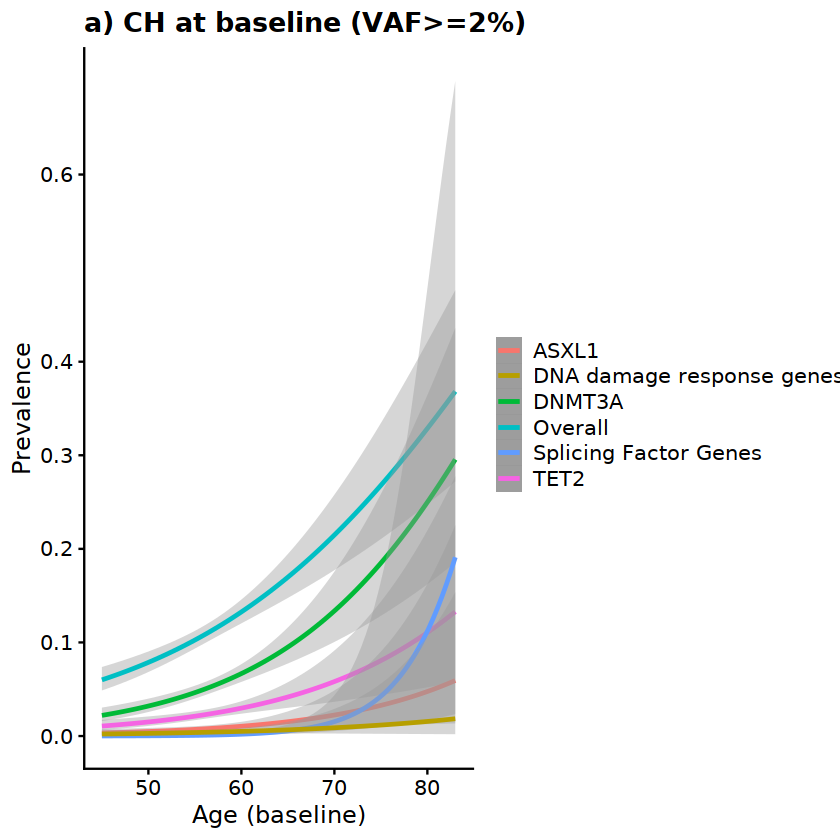

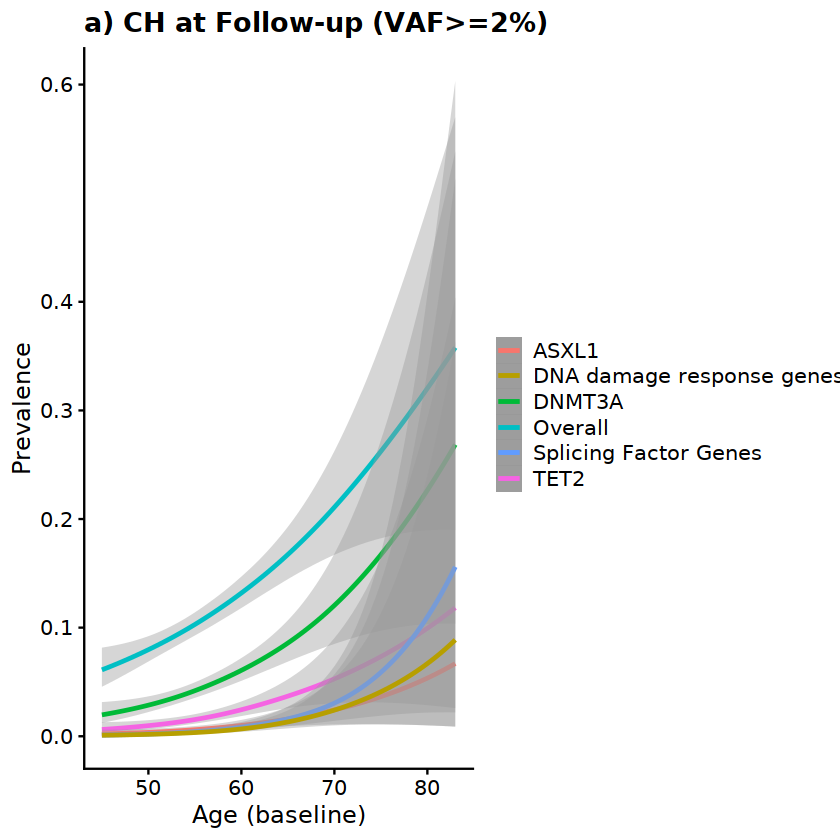

In [7]:
ggplot(data=aric_baseline, aes(x=age_base), group=1) + xlab("Age (baseline)") + ylab("Prevalence") +
  geom_smooth(aes(y=CH_baseline, colour="Overall"), method ="glm", method.args = list(family = "binomial")) +
  geom_smooth(aes(y=DNMT3A, colour="DNMT3A"), method ="glm", method.args = list(family = "binomial")) +
geom_smooth(aes(y=TET2, colour="TET2"), method ="glm", method.args = list(family = "binomial")) +
geom_smooth(aes(y=ASXL1, colour="ASXL1"), method ="glm", method.args = list(family = "binomial")) +
geom_smooth(aes(y=SF, colour="Splicing Factor Genes"), method ="glm", method.args = list(family = "binomial")) +
geom_smooth(aes(y=DDR, colour="DNA damage response genes"), method ="glm", method.args = list(family = "binomial")) +
  theme(legend.title = element_blank(), legend.position = "right") +
  scale_y_continuous(breaks = c(seq(from = 0, to = 0.3, by = 0.1), 0.4, 0.6, 0.8) )+
  ggtitle("a) CH at baseline (VAF>=2%)")

# V 05 
ggplot(data=aric_v05, aes(x=age_base), group=1) + xlab("Age (baseline)") + ylab("Prevalence") +
  geom_smooth(aes(y=CH_baseline, colour="Overall"), method ="gam", method.args = list(family = "binomial")) +
  geom_smooth(aes(y=DNMT3A, colour="DNMT3A"), method ="gam", method.args = list(family = "binomial")) +
geom_smooth(aes(y=TET2, colour="TET2"), method ="gam", method.args = list(family = "binomial")) +
geom_smooth(aes(y=ASXL1, colour="ASXL1"), method ="gam", method.args = list(family = "binomial")) +
geom_smooth(aes(y=SF, colour="Splicing Factor Genes"), method ="gam", method.args = list(family = "binomial")) +
geom_smooth(aes(y=DDR, colour="DNA damage response genes"), method ="gam", method.args = list(family = "binomial")) +
  theme(legend.title = element_blank(), legend.position = "right") +
  scale_y_continuous(breaks = c(seq(from = 0, to = 0.3, by = 0.1), 0.4, 0.6, 0.8) )+
  ggtitle("a) CH at Follow-up (VAF>=2%)")

### Prevalence

In [8]:
table(aric_baseline_n_v05$CH_baseline, exclude = NULL)
table(aric_baseline_n_v05$CH_v05, exclude = NULL)
table(aric_baseline_n_v05$CH_baseline==1, aric_baseline_n_v05$CH_v05==1, exclude = NULL)


   0    1 
3732  457 


   0    1 
3142 1047 

       
        FALSE TRUE
  FALSE  2997  735
  TRUE    145  312

In [9]:
# total N with CH data: 87,116
baseline_CH <- aric_baseline_n_v05[,c(1,6,58,85,8)]  
names(baseline_CH) <- c("SampleID", "Gender", "Age", 
                            "Ancestry", "CHIP_status")
baseline_CH$Cohort <- "Baseline"

FollowUP_CH <- aric_baseline_n_v05[,c(1,6,7,85,8)]  
names(FollowUP_CH) <- c("SampleID", "Gender", "Age", 
                            "Ancestry", "CHIP_status")
FollowUP_CH$Cohort <- "Follow-Up"

prev.baseline_n_followup <- rbind.data.frame(baseline_CH, 
                                             FollowUP_CH)


`geom_smooth()` using formula 'y ~ x'



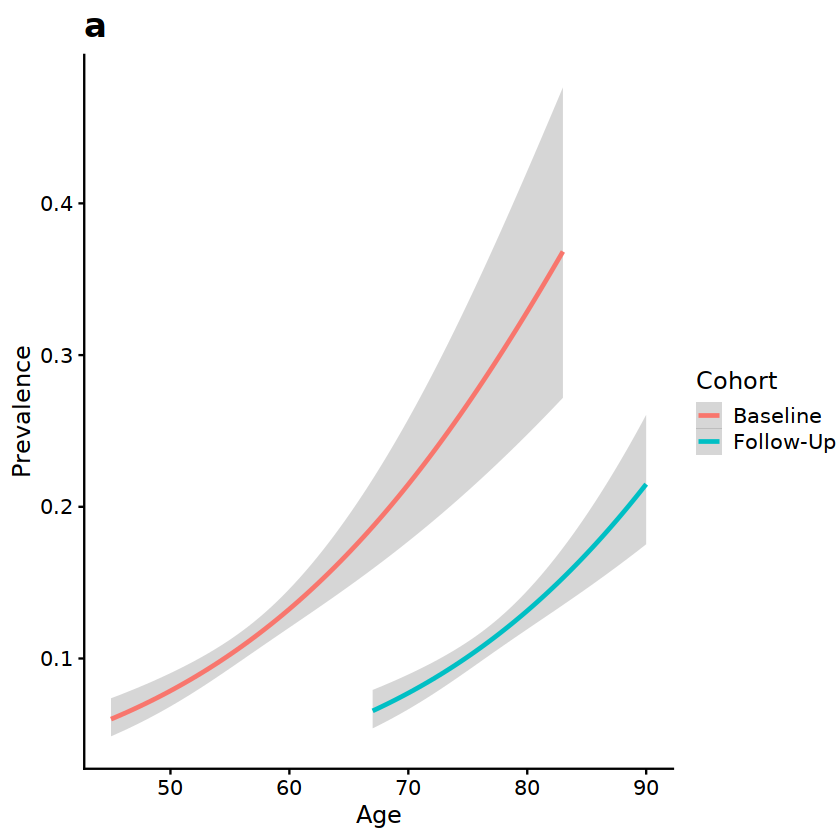

In [18]:
ggplot(data=prev.baseline_n_followup, aes(x=Age, y=CHIP_status, group=Cohort)) + 
  geom_smooth(aes(colour=Cohort), method ="glm", 
              method.args = list(family = "binomial")) + 
  xlab("Age") + ylab("Prevalence") + ggtitle("a") + 
  scale_y_continuous(breaks = c(seq(from = 0, to = 0.6, by = 0.1)) ) + 
scale_x_continuous(breaks = c(seq(0, 100, 10) )) + 
theme(legend.position = "right", plot.title = element_text(size = 20, face = "bold"))



`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



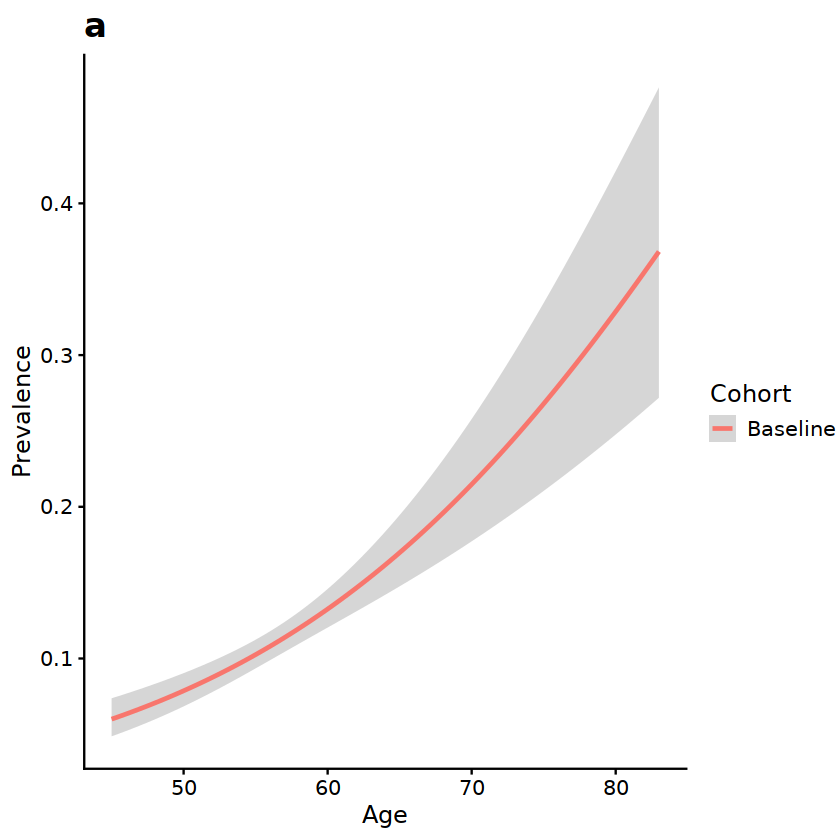

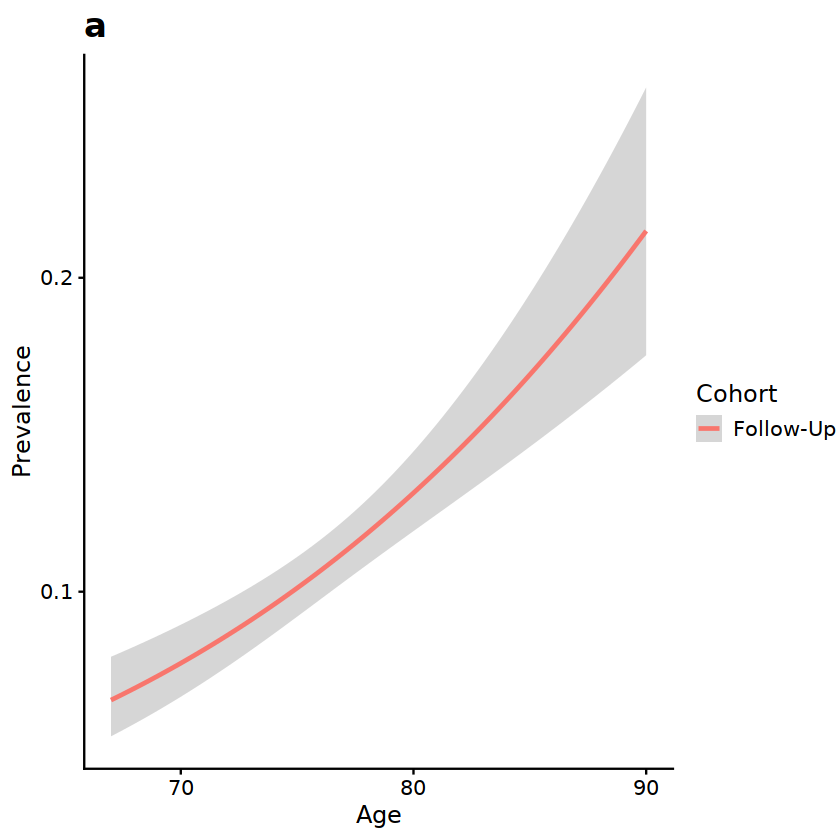

In [13]:
prev.baseline_n_followup %>% filter(Cohort=="Baseline") %>% ggplot(data=., aes(x=Age, y=CHIP_status, group=Cohort)) + 
  geom_smooth(aes(colour=Cohort), method ="glm", 
              method.args = list(family = "binomial")) + 
  xlab("Age") + ylab("Prevalence") + ggtitle("a") + 
  scale_y_continuous(breaks = c(seq(from = 0, to = 0.6, by = 0.1)) ) + 
scale_x_continuous(breaks = c(seq(0, 100, 10) )) + 
theme(legend.position = "right", plot.title = element_text(size = 20, face = "bold"))

prev.baseline_n_followup %>% filter(Cohort=="Follow-Up") %>% ggplot(data=., aes(x=Age, y=CHIP_status, group=Cohort)) + 
  geom_smooth(aes(colour=Cohort), method ="glm", 
              method.args = list(family = "binomial")) + 
  xlab("Age") + ylab("Prevalence") + ggtitle("a") + 
  scale_y_continuous(breaks = c(seq(from = 0, to = 0.6, by = 0.1)) ) + 
scale_x_continuous(breaks = c(seq(0, 100, 10) )) + 
theme(legend.position = "right", plot.title = element_text(size = 20, face = "bold"))

### Variants

In [8]:
# names(ch_var_in_baseline_qcd.pheno)
baseline_var <- ch_var_in_baseline_qcd.pheno[,c(1, 9, 11)]  
names(baseline_var) <- c("SampleID", "Gene", "VAF")
baseline_var$Cohort <- "Baseline"

# names(ch_var_in_v05_qcd.pheno)
FollowUP_var <- ch_var_in_v05_qcd.pheno[,c(1, 9, 11)]  
names(FollowUP_var) <- c("SampleID", "Gene", "VAF")
FollowUP_var$Cohort <- "Follow-Up"

var.baseline_n_followup <- rbind.data.frame(baseline_var, 
                                            FollowUP_var)


In [ ]:
################ Prevalence at Baseline
a = ggplot(data=aric_baseline, aes(x=age_base), group=1) + xlab("Age (baseline)") + ylab("Prevalence") +
  # geom_smooth(aes(y=`VAF_1%`, colour="VAF_1%"), method ="glm", method.args = list(family = "binomial")) +
  geom_smooth(aes(y=CH_baseline, colour="All (N=10,881)"), method ="glm", method.args = list(family = "binomial")) +
  geom_smooth(aes(y=CH_baseline_v05, colour="Longitudinal Samples (N=4,189)"), method ="glm", method.args = list(family = "binomial")) +
  theme(legend.title = element_blank(), legend.position = "") +
  scale_y_continuous(breaks = c(seq(from = 0, to = 0.3, by = 0.1), 0.4, 0.6, 0.8) )+
  ggtitle("a) CH at baseline (VAF>=2%)")

b = ggplot(data=aric_baseline, aes(x=age_base), group=1) + xlab("Age (baseline)") + ylab("Prevalence") +
  # geom_smooth(aes(y=`VAF_1%`, colour="VAF_1%"), method ="glm", method.args = list(family = "binomial")) +
  #geom_smooth(aes(y=CH_baseline, colour="All (N=10,881)"), method ="glm", method.args = list(family = "binomial")) +
  geom_smooth(aes(y=CHvaf10_baseline, colour="All (N=10,881)"), method ="glm", method.args = list(family = "binomial")) +
  #geom_smooth(aes(y=CH_baseline_v05, colour="Longitudinal Samples (N=4,189)"), method ="glm", method.args = list(family = "binomial")) +
  geom_smooth(aes(y=CHvaf10_baseline_v05, colour="Longitudinal Samples (N=4,189)"), method ="glm", method.args = list(family = "binomial")) +
  theme(legend.title = element_blank(), legend.position = "right") +
  scale_y_continuous(breaks = c(seq(from = 0, to = 0.3, by = 0.1), 0.4, 0.6, 0.8) )+
  ggtitle("b) CH at baseline (VAF>=10%)")




In [ ]:
png("prevalence_at_baseline.2023Feb14.png",
    width=18, height=6, units= "in", res=300, pointsize = 4)

ggarrange(a,b, ncol = 2, nrow = 1 )

dev.off()

In [ ]:
p1 <- ggplot(data=CHIP_Gene_Table.aric, aes(x=reorder(Var1, -Freq),
                                            y=Freq)) +
  xlab("") +
  ylab("N") +
  geom_bar(stat="identity", width=0.8, position=position_dodge()) +
  geom_text(aes(label=Freq), vjust=-0.5, color="black",
            position = position_dodge(0.9), size=3) +
  theme(axis.text.x = element_text(angle = 90,
                                   vjust = 1,  hjust=1),
        legend.position = "") + ggtitle("a") 
##
CHIP_persample_Table.aric <- as.data.frame(table(table(chip.hg38_aric.AN_PASS$GWAS_ID)),
                                           stringsAsFactors = F)

CHIP_persample_Table.aric$Var1 <- factor(CHIP_persample_Table.aric$Var1, levels = c(1:8,10,49))

p2 <- ggplot(data=CHIP_persample_Table.aric, aes(x=Var1,
                                                 y=Freq)) +
  xlab("n CHIP") +
  ylab("N") +
  geom_bar(stat="identity", width=0.8, position=position_dodge()) +
  geom_text(aes(label=Freq), vjust=-0.5, color="black",
            position = position_dodge(0.9), size=3) +
  theme(axis.text.x = element_text(angle = 90,
                                   vjust = 1,  hjust=1),
        legend.position = "") + ggtitle("b") 



# ## VAF distribution
CHIP_Gene_Table.10 <- subset(chip.hg38_aric.AN_PASS, 
                             chip.hg38_aric.AN_PASS$Gene.refGene %in%
                               head(CHIP_Gene_Table.aric[order(CHIP_Gene_Table.aric$Freq, decreasing = T),1],10))

CHIP_Gene_Table.10$Gene.refGene <- factor(CHIP_Gene_Table.10$Gene.refGene, levels = head(CHIP_Gene_Table.aric[order(CHIP_Gene_Table.aric$Freq, decreasing = T),1],10))

CHIP_Gene_Table.10$VAF <- as.numeric(CHIP_Gene_Table.10$AF)

p3 <- ggplot(data=CHIP_Gene_Table.10, aes(x=Gene.refGene, y=VAF)) +
  xlab("") + ylab("Variant Allele Fraction") +
  geom_boxplot() + #scale_y_log10() +
  # geom_violin() +# scale_y_log10()
  theme(axis.text.x = element_text(angle = 90, vjust = 1,  hjust=1),
        legend.title = element_blank(), legend.position = "right") +
  #scale_y_continuous(breaks = c(seq(from = 0, to = 0.2, by = 0.05), 0.5,1) )+
  scale_y_continuous(breaks = c(0.02,0.1,.2,.3, 0.5,.75,1) )+
  
  ggtitle("c")

png("/Users/muddin/Documents/Project/CHIP_annotation/2022_CHIP_Call/ARIC_hg38/chip_distribution.ARIC_hg38.21April2022.png",
    width=18, height=12, units= "in", res=300, pointsize = 4)

ggarrange(p1,p2,p3, ncol = 2, nrow = 2 )

dev.off()


In [32]:
# save.image("Fig_1_dat.Apr13.rda")

In [ ]:
load("Fig_1_dat.Apr13.rda")

In [ ]:

# 0    1 <NA> 
#   3918  271   44
# 3443  271  519
### Incident CH by top Genes
sort(table(ch_var_in_v05_qcd$Gene[ !(ch_var_in_v05_qcd$GWAS_ID %in% ch_var_in_baseline_qcd$GWAS_ID) ]), decreasing = T)

# DNMT3A   TET2  ASXL1  SF3B1  PPM1D  U2AF1   TP53 ZBTB33  SRSF2  STAG2   JAK2 ZNF318 
# 334    178     64     36     31     27     22     19     18     16     14     12 
# YLPM1  PDS5B  SRCAP    CBL   GNB1  ZRSR2  BRCC3   PHIP  ASXL2   IDH2  KDM6A   KRAS 
# 11     10     10      8      7      7      6      6      5      5      4      4 
# NF1  PRPF8 CREBBP   CUX1   NXF1   PHF6   BRAF  EP300   NRAS   PTEN  RAD21   BCOR 
# 4      4      3      3      3      3      2      2      2      2      2      1 
# CBLB   CTCF   ETV6   EZH2   IDH1    KIT    MPL PTPN11  RUNX1 SETBP1  SETD2  SUZ12 
# 1      1      1      1      1      1      1      1      1      1      1      1

aric_v05.mapped$incident_DNMT3A <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="DNMT3A"], 1, 
                                           ifelse( ( ( (aric_v05.mapped$CH_baseline==0) & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="DNMT3A"]) ) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))

table(aric_v05.mapped$incident_DNMT3A, exclude = NULL)
# 0    1 <NA> 
#   3877  312   44
# 3402  312  519 

aric_v05.mapped$incident_TET2 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="TET2"], 1, 
                                         ifelse( ( ((aric_v05.mapped$CH_baseline==0) &  (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="TET2"]) ) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))

table(aric_v05.mapped$incident_TET2, exclude = NULL)
# 0    1 <NA> 
#   4025  164   44
# 3550  164  519

aric_v05.mapped$incident_ASXL1 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="ASXL1"], 1, 
                                          ifelse( ( ((aric_v05.mapped$CH_baseline==0) & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="ASXL1"]) ) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))

table(aric_v05.mapped$incident_ASXL1, exclude = NULL)
# 0    1 <NA> 
#   4125   64   44
# 3650   64  519

## SF3B1  PPM1D  U2AF1   TP53 ZBTB33  SRSF2  STAG2   JAK2 ZNF318
aric_v05.mapped$incident_SF3B1 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="SF3B1"], 1, 
                                          ifelse( ( ( (aric_v05.mapped$CH_baseline==0) & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="SF3B1"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))
table(aric_v05.mapped$incident_SF3B1, exclude = NULL)
# 0    1 <NA> 
#   4154   35   44
# 3679   35  519

aric_v05.mapped$incident_PPM1D <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="PPM1D"], 1, 
                                          ifelse( ( ((aric_v05.mapped$CH_baseline==0) & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="PPM1D"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))
table(aric_v05.mapped$incident_PPM1D, exclude = NULL)
# 0    1 <NA> 
#   4159   30   44
# 3684   30  519
aric_v05.mapped$incident_U2AF1 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="U2AF1"], 1, 
                                          ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="U2AF1"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))
table(aric_v05.mapped$incident_U2AF1, exclude = NULL)
# 0    1 <NA> 
#   4163   26   44
# 3688   26  519 

aric_v05.mapped$incident_TP53 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="TP53"], 1, 
                                         ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="TP53"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))
table(aric_v05.mapped$incident_TP53, exclude = NULL)
# 0    1 <NA> 
#   4169   20   44
# 3694   20  519
aric_v05.mapped$incident_ZBTB33 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="ZBTB33"], 1, 
                                           ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="ZBTB33"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))
table(aric_v05.mapped$incident_ZBTB33, exclude = NULL)
# 0    1 <NA> 
#   4170   19   44
# 3695   19  519
aric_v05.mapped$incident_SRSF2 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="SRSF2"], 1, 
                                          ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="SRSF2"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))
table(aric_v05.mapped$incident_SRSF2, exclude = NULL)
# 0    1 <NA> 
#   4171   18   44
# 3696   18  519
aric_v05.mapped$incident_STAG2 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="STAG2"], 1, 
                                          ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="STAG2"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))
table(aric_v05.mapped$incident_STAG2, exclude = NULL)
# 0    1 <NA> 
#   4173   16   44
# 3698   16  519
aric_v05.mapped$incident_JAK2 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="JAK2"], 1, 
                                         ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="JAK2"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))
table(aric_v05.mapped$incident_JAK2, exclude = NULL)
# 0    1 <NA> 
#   4175   14   44
# 3700   14  519
aric_v05.mapped$incident_ZNF318 <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="ZNF318"], 1, 
                                           ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="ZNF318"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))
table(aric_v05.mapped$incident_ZNF318, exclude = NULL)
# 0    1 <NA> 
#   4178   11   44
# 3703   11  519


# Groupings
aric_v05.mapped$incident_DTA <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="ASXL1" | ch_var_in_v05_qcd$Gene=="DNMT3A" | ch_var_in_v05_qcd$Gene=="TET2"], 1, 
                                        ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene!="ASXL1" | ch_var_in_v05_qcd$Gene!="DNMT3A" | ch_var_in_v05_qcd$Gene!="TET2"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))

table(aric_v05.mapped$incident_DTA, exclude = NULL)
# 0    1 <NA> 
#   3676  513   44
# 3201  513  519
# Splicing factors: SF3B1, U2AF1, SRSF2, ZRSR2
aric_v05.mapped$incident_SF <- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="SF3B1" | ch_var_in_v05_qcd$Gene=="U2AF1" | ch_var_in_v05_qcd$Gene=="SRSF2" | ch_var_in_v05_qcd$Gene=="ZRSR2"], 1, 
                                       ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene !="SF3B1" | ch_var_in_v05_qcd$Gene !="U2AF1" | ch_var_in_v05_qcd$Gene!="SRSF2" | ch_var_in_v05_qcd$Gene!="ZRSR2"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))

table(aric_v05.mapped$incident_SF, exclude = NULL)
# 0    1 <NA> 
#   4105   84   44
# 3630   84  519

# DNA damage repair: TP53, PPM1D
aric_v05.mapped$incident_DDR<- ifelse( aric_v05.mapped$incident_CH==1 & aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ ch_var_in_v05_qcd$Gene=="TP53" | ch_var_in_v05_qcd$Gene=="PPM1D" ], 1, 
                                       ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% ch_var_in_v05_qcd$GWAS_ID[ch_var_in_v05_qcd$Gene !="TP53" | ch_var_in_v05_qcd$Gene !="PPM1D"])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))

table(aric_v05.mapped$incident_DDR, exclude = NULL)
# 0    1 <NA> 
#   3664   50  519

# Single vs multiple clones
# sort(table(ch_var_in_v05_qcd$Gene[ !(ch_var_in_v05_qcd$GWAS_ID %in% ch_var_in_baseline_qcd$GWAS_ID) & !duplicated(ch_var_in_v05_qcd$GWAS_ID) ]), decreasing = T)
# sort(table(ch_var_in_v05_qcd$Gene[ !(ch_var_in_v05_qcd$GWAS_ID %in% ch_var_in_baseline_qcd$GWAS_ID) & duplicated(ch_var_in_v05_qcd$GWAS_ID) ]), decreasing = T)

var_per_sam_v05 <- as.data.frame(table(ch_var_in_v05_qcd$GWAS_ID), stringsAsFactors = F)  
var_per_sam_baseline <- as.data.frame(table(ch_var_in_baseline_qcd$GWAS_ID), stringsAsFactors = F)  

aric_v05.mapped$incident_CH_singleMut <- ifelse( (aric_v05.mapped$incident_CH==1 & (aric_v05.mapped$GWAS_ID %in% var_per_sam_v05$Var1[var_per_sam_v05$Freq==1]) ), 1, 
                                                 ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% var_per_sam_v05$Var1[var_per_sam_v05$Freq>1])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))

table(aric_v05.mapped$incident_CH_singleMut, exclude = NULL)
# 0    1 <NA> 
#   3571  618   44
# 3096  618  519

aric_v05.mapped$incident_CH_multipleMut <- ifelse( (aric_v05.mapped$incident_CH==1 & (aric_v05.mapped$GWAS_ID %in% var_per_sam_v05$Var1[var_per_sam_v05$Freq>1]) ), 1, 
                                                   ifelse( ( (aric_v05.mapped$CH_baseline==0 & (aric_v05.mapped$CH_v05 ==0 | aric_v05.mapped$incident_CH==0 |  aric_v05.mapped$GWAS_ID %in% var_per_sam_v05$Var1[var_per_sam_v05$Freq==1])) & !is.na(aric_v05.mapped$CH_baseline) ), 0, NA))

table(aric_v05.mapped$incident_CH_multipleMut, exclude = NULL)
# 0    1 <NA> 
#   4065  124   44
# 3590  124  519

table(aric_v05.mapped$incident_CH, aric_v05.mapped$incident_CH_multipleMut, exclude = NULL)
# 0    1 <NA>
#   0    3447    0    0
# 1     618  124    0
# <NA>    0    0   44